In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
two_blobs = pd.read_csv("cluster_two_blobs.csv")
two_blobs_outliers = pd.read_csv("cluster_two_blobs_outliers.csv")

<Axes: xlabel='X1', ylabel='X2'>

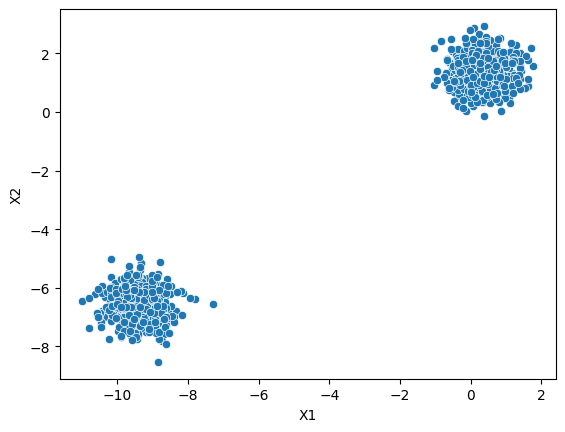

In [4]:
sns.scatterplot(data=two_blobs,x ="X1", y="X2" )

<Axes: xlabel='X1', ylabel='X2'>

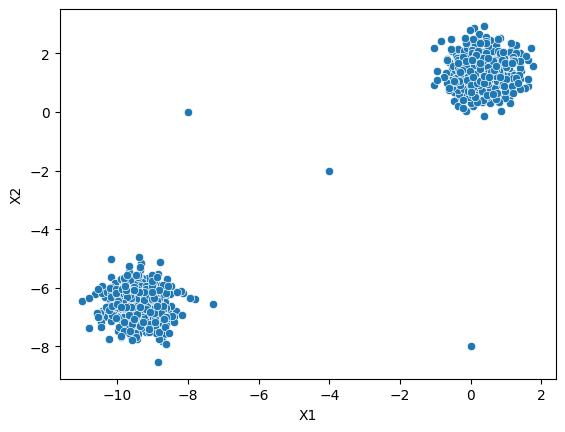

In [5]:
sns.scatterplot(data=two_blobs_outliers, x="X1", y="X2")

In [6]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x="X1", y="X2", hue=labels, palette='Set1')
    

In [7]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()


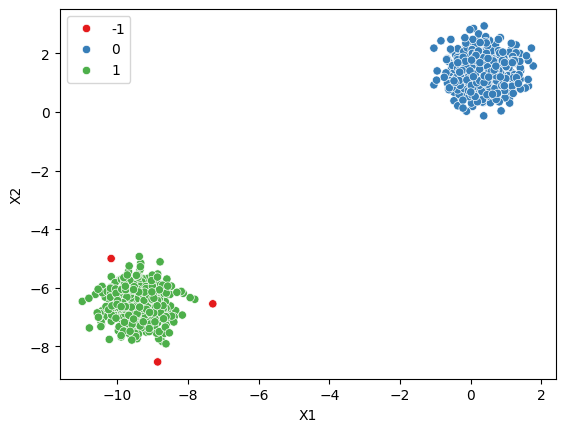

In [8]:
display_categories(dbscan, two_blobs)

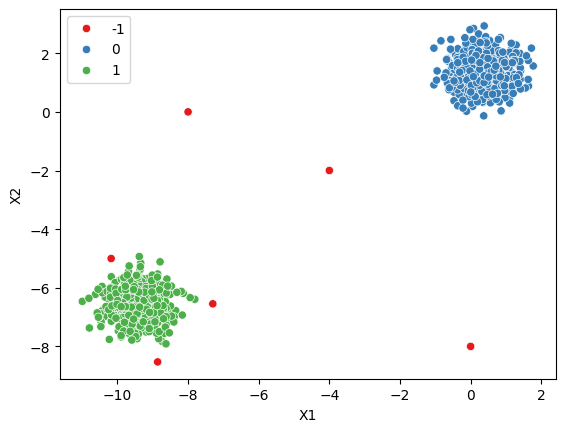

In [9]:
display_categories(dbscan, two_blobs_outliers)

In [ ]:
np.sum(dbscan.labels_ == -1) # total outliers present

np.int64(6)

In [11]:
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

np.float64(0.5982053838484547)

In [12]:
len(dbscan.labels_)

1003

In [ ]:
outlier_percent = []
number_of_outliers = []

for eps in np.arange(1, 100):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    #total outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # percentage of points as outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

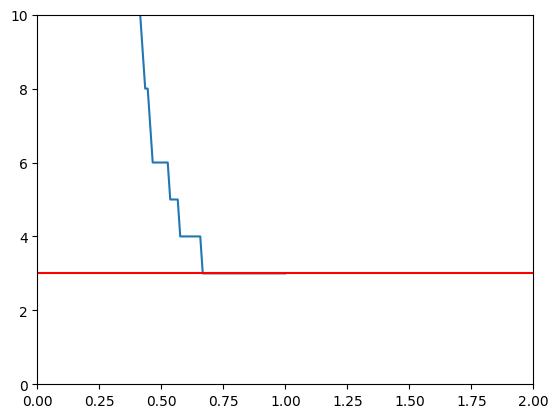

In [32]:
sns.lineplot(x = np.linspace(0.001, 1 , 100), y=number_of_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3, xmin=0, xmax=2, color='red')

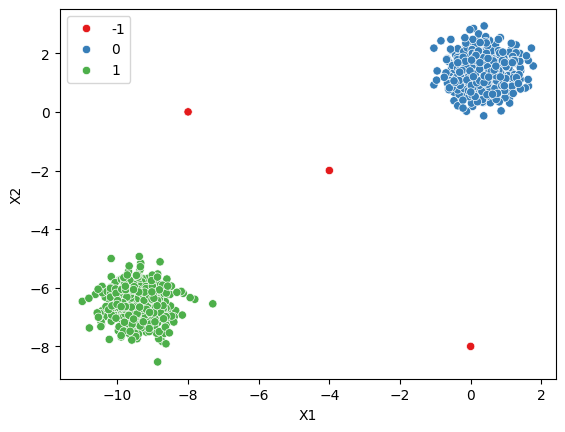

In [28]:
dbscan = DBSCAN(eps=0.75)
display_categories(dbscan, two_blobs_outliers)

Text(0, 0.5, 'Percent of Points as Outliers')

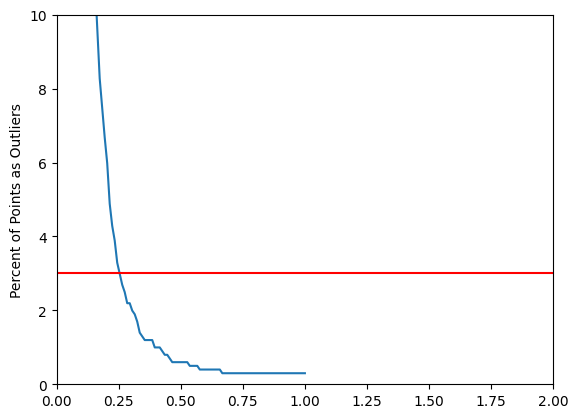

In [33]:
sns.lineplot(x = np.linspace(0.001, 1, 100), y=outlier_percent)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3, xmin=0, xmax=2, color='red')

plt.ylabel('Percent of Points as Outliers')